In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df['x1'] = [1,2,3,4,5,6,6,7,9,9]
df['x2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<AxesSubplot:xlabel='x1', ylabel='x2'>

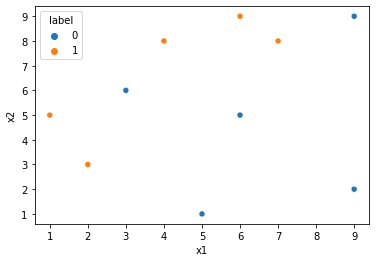

In [5]:
import seaborn as sns
sns.scatterplot(x=df['x1'],y=df['x2'],hue=df['label'])

In [6]:
df['weights'] = 1/df.shape[0]

In [7]:
df

,x1,x2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [12]:
x = df.iloc[:,:2].values
y = df.iloc[:,2].values

In [13]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

<AxesSubplot:>

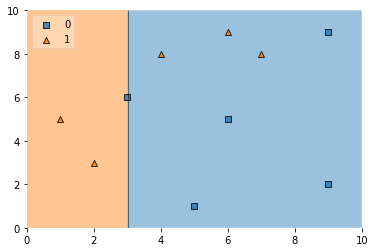

In [15]:
plot_decision_regions(x,y,clf=dt1,legend=2)

In [16]:
df['y_pred'] = dt1.predict(x)

In [17]:
df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [18]:
def calculate_error_weight(error):
    return 0.5*np.log((1-error)/(error))

In [20]:
#calculate model weight
alpha1 = calculate_error_weight(0.3)
alpha1

0.42364893019360184

In [23]:
# Update weights
def update_row_weights(row,alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [24]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [25]:
df

,x1,x2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [26]:
df['updated_weights'].sum()

0.9165153319682015

In [27]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [28]:
df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [29]:
df['normalized_weights'].sum()

1.0

In [31]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [32]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [33]:
df[['x1','x2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,x1,x2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [36]:
def create_new_dataset(df):
    indices = []
    
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper']>a and a>row['cumsum_lower']:
                indices.append(index)
    return indices

In [37]:
index_values = create_new_dataset(df)
index_values

[3, 7, 3, 5, 3, 3, 9, 4, 7, 1]

In [38]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [39]:
second_df

,x1,x2,label,weights
3,4,8,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1
5,6,9,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
9,9,2,0,0.1
4,5,1,0,0.1
7,7,8,1,0.1
1,2,3,1,0.1


In [40]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [41]:
x = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [42]:
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

<AxesSubplot:>

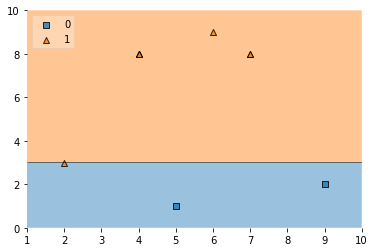

In [44]:
plot_decision_regions(x,y,clf=dt2,legend=2)

In [45]:
second_df['y_pred'] = dt2.predict(x)

In [47]:
second_df

,x1,x2,label,weights,y_pred
3,4,8,1,0.1,1
7,7,8,1,0.1,1
3,4,8,1,0.1,1
5,6,9,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
9,9,2,0,0.1,0
4,5,1,0,0.1,0
7,7,8,1,0.1,1
1,2,3,1,0.1,1


In [49]:
# prediction